In [2]:
import pandas as pd
import matplotlib

In [3]:
dadosENEM = pd.read_csv('microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv',sep=';',encoding='ISO-8859-1',nrows=100) #lendo arquivo, dizendo o separador, tipo de codificacao, e quantidade de linhas

In [17]:
colunas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA' ,'NU_IDADE','IN_GESTANTE', 'TP_SEXO' ,'TP_COR_RACA', 'TP_NACIONALIDADE',
 'TP_ESCOLA', 'TP_ENSINO' ,'CO_MUNICIPIO_PROVA' ,'NO_MUNICIPIO_PROVA' ,'CO_UF_PROVA', 'SG_UF_PROVA' ,'TP_PRESENCA_CN',
 'TP_PRESENCA_CH' ,'TP_PRESENCA_LC', 'TP_PRESENCA_MT' ,'CO_PROVA_CN' ,'CO_PROVA_CH' ,'CO_PROVA_LC' ,'CO_PROVA_MT' ,'NU_NOTA_CN',
 'NU_NOTA_CH' ,'NU_NOTA_LC' ,'NU_NOTA_MT' ,'TP_STATUS_REDACAO' ,'NU_NOTA_COMP1' ,'NU_NOTA_COMP2' ,'NU_NOTA_COMP3' ,'NU_NOTA_COMP4'
 'NU_NOTA_COMP5' ,'NU_NOTA_REDACAO','Q001','Q002'] #selecionando algumas colunas

In [18]:
dados_selecionados = dadosENEM.filter(items=colunas)
dados_selecionados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,IN_GESTANTE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_PROVA,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,DF,44,0,M,1,0,2,1.0,5210208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A
1,180007197856,MA,23,0,F,3,1,1,1.0,2111102,...,568.7,513.1,480.3,1.0,120.0,40.0,40.0,280.0,B,B
2,180008517434,SP,23,0,F,1,1,1,3.0,4314902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E
3,180007661228,BA,26,0,F,3,2,1,1.0,2916401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C
4,180008787987,BA,20,0,M,0,1,2,1.0,2918100,...,419.9,345.8,NaN,1.0,140.0,40.0,40.0,360.0,C,E


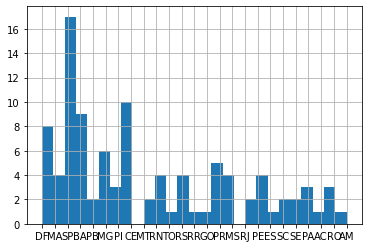

In [6]:
dados_selecionados['SG_UF_RESIDENCIA'].hist(bins=27)

In [9]:
newcolumns = ['TP_SEXO', 'NU_NOTA_REDACAO'] #separando as colunas desejadas
notaRedacao = dados_selecionados.filter(items = newcolumns)
notaRedacao['NU_NOTA_REDACAO'] = notaRedacao['NU_NOTA_REDACAO'].fillna(0) #substituindo a ocorrencia de NaN

In [11]:
print(notaRedacao)

TP_SEXO  NU_NOTA_REDACAO
0        M              0.0
1        F            280.0
2        F              0.0
3        F              0.0
4        M            360.0
..     ...              ...
95       F              0.0
96       F              0.0
97       F              0.0
98       F              0.0
99       F              0.0

[100 rows x 2 columns]


In [12]:
notaRedacao.groupby('TP_SEXO').max() #groupby agrupa de acordo com o parametro
                                    #descobrindo a nota maxima de cada sexo

,NU_NOTA_REDACAO
TP_SEXO,
F,800.0
M,920.0


In [13]:
notaRedacao[notaRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min() #descobrindo a nota minina de cada sexo, sendo a nota maior que zero

,NU_NOTA_REDACAO
TP_SEXO,
F,280.0
M,280.0


In [14]:
notaRedacao[notaRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').mean() #media por sexo

,NU_NOTA_REDACAO
TP_SEXO,
F,555.454545
M,566.086957


In [15]:
notaRedacao[notaRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').median() #mediana por sexo

,NU_NOTA_REDACAO
TP_SEXO,
F,570.0
M,580.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

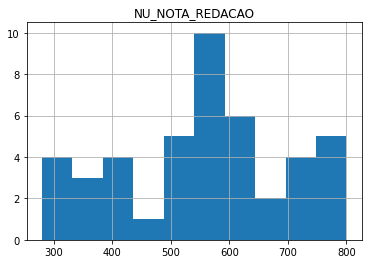

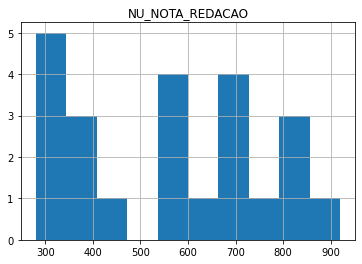

In [16]:
notaRedacao[notaRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').hist()

In [20]:
colQuest = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002'] #selecionando colunas para analise das respostas socioeconomicas
socioEco = dados_selecionados.filter(items=colQuest)
questDict = {'A':'Nunca estudou.'
,'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.'
,'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.'
,'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.'
,'E':'Completou o Ensino Médio, mas não completou a Faculdade.'
,'F':'Completou a Faculdade, mas não completou a Pós-graduação.'
,'G':'Completou a Pós-graduação.'
,'H':'Não sei.'} #traducao das opcoes do questionario


In [33]:
socioEco.filter(items = ['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,4
B,26
C,13
D,15
E,29
F,2
G,1
H,10


In [31]:
print(socioEco.Q001)

0     A
1     B
2     E
3     B
4     C
     ..
95    D
96    E
97    B
98    B
99    H
Name: Q001, Length: 100, dtype: object


In [34]:
socioEco['NO_Q001'] = [questDict[resp] for resp in socioEco.Q001] #criando nova coluna contendo a traducao, substituindo o valor original pelo valor no dicionario
print(socioEco)

NU_INSCRICAO  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002  \
0   180008202043         NaN              NaN    A    A   
1   180007197856       480.3            280.0    B    B   
2   180008517434         NaN              NaN    E    E   
3   180007661228         NaN              NaN    B    C   
4   180008787987         NaN            360.0    C    E   
..           ...         ...              ...  ...  ...   
95  180008257077         NaN              NaN    D    C   
96  180008411111         NaN              NaN    E    F   
97  180008202053         NaN              NaN    B    G   
98  180007286714         NaN              NaN    B    D   
99  180008196159         NaN              NaN    H    D   

                                              NO_Q001  
0                                      Nunca estudou.  
1   Não completou a 4ª série/5º ano do Ensino Fund...  
2   Completou o Ensino Médio, mas não completou a ...  
3   Não completou a 4ª série/5º ano do Ensino Fund...  
4   Completou a

In [35]:
socioEco['NO_Q002'] = [questDict[resp] for resp in socioEco.Q002] #criando nova coluna contendo a traducao, substituindo o valor original pelo valor no dicionario
print(socioEco)

NU_INSCRICAO  NU_NOTA_MT  NU_NOTA_REDACAO Q001 Q002  \
0   180008202043         NaN              NaN    A    A   
1   180007197856       480.3            280.0    B    B   
2   180008517434         NaN              NaN    E    E   
3   180007661228         NaN              NaN    B    C   
4   180008787987         NaN            360.0    C    E   
..           ...         ...              ...  ...  ...   
95  180008257077         NaN              NaN    D    C   
96  180008411111         NaN              NaN    E    F   
97  180008202053         NaN              NaN    B    G   
98  180007286714         NaN              NaN    B    D   
99  180008196159         NaN              NaN    H    D   

                                              NO_Q001  \
0                                      Nunca estudou.   
1   Não completou a 4ª série/5º ano do Ensino Fund...   
2   Completou o Ensino Médio, mas não completou a ...   
3   Não completou a 4ª série/5º ano do Ensino Fund...   
4   Comple

In [40]:
socioEco.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO',ascending=False) #selecionando por pessoa, as respostas da questao 1, e fazendo contagem das aparicoes de uma determinada resposta, ordenando por quantidade

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",29
Não completou a 4ª série/5º ano do Ensino Fundamental.,26
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",15
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",13
Não sei.,10
Nunca estudou.,4
"Completou a Faculdade, mas não completou a Pós-graduação.",2
Completou a Pós-graduação.,1


In [41]:
socioEco.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT',ascending=False) #verificando nota media em matematica dos inscritos, de acordo com escolaridade do pai, e ordenando por maior nota

,NU_NOTA_MT
NO_Q001,
Nunca estudou.,606.400000
Completou a Pós-graduação.,603.900000
Não sei.,599.200000
"Completou o Ensino Médio, mas não completou a Faculdade.",540.523529
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",520.230000
Não completou a 4ª série/5º ano do Ensino Fundamental.,514.146667
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",510.475000
"Completou a Faculdade, mas não completou a Pós-graduação.",NaN


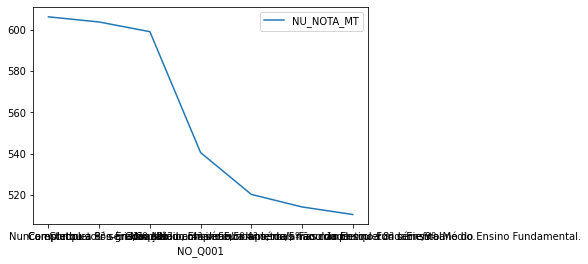

In [42]:
notaPorPai = socioEco.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT',ascending=False)
notaPorPai.plot() #verificando o comportamento da variacao das notas

In [53]:

socioEco['SG_UF_RESIDENCIA'] = dados_selecionados.SG_UF_RESIDENCIA #adicionando no dataframe socioEco a coluna SG_UF_RESIDENCIA vindo do dataframe dados_selecionados


socioEco.filter(items = ['NU_NOTA_REDACAO','NO_Q002']).where(socioEco.SG_UF_RESIDENCIA =='SP').groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO',ascending=False) #filtrando a nota da redacao e resposta questao 2, selecionando estado SP, agrupando de acordo com a resposta q2, fazendo media das notas de redacao e ordenando de acordo com o grupo que apresenta maior media

,NU_NOTA_REDACAO
NO_Q002,
"Completou a Faculdade, mas não completou a Pós-graduação.",700.000000
"Completou o Ensino Médio, mas não completou a Faculdade.",653.333333
Não completou a 4ª série/5º ano do Ensino Fundamental.,650.000000
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",626.666667
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",493.333333


In [54]:
socioEco.filter(items = ['SG_UF_RESIDENCIA','NU_NOTA_REDACAO','NO_Q002']).groupby(['SG_UF_RESIDENCIA','NO_Q002']).mean() #trazendo o resultado para cada estado, agrupado primeiro pelo estado, e depois pela resposta, fazendo a media da nota da redacao

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Nunca estudou.                                                  NaN
AM               Completou a Faculdade, mas não completou a Pós-...              NaN
BA               Completou a 4ª série/5º ano, mas não completou ...              NaN
                 Completou a 8ª série/9º ano do Ensino Fundament...       320.000000
                 Completou o Ensino Médio, mas não completou a F...       452.000000
CE               Completou a 4ª série/5º ano, mas não completou ...       580.000000
                 Completou a 8ª série/9º ano do Ensino Fundament...       460.000000
                 Completou o Ensino Médio, mas não completou a F...       690.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...       280.000000
DF               Completou a 8ª série/9º ano do Ensino Fundament...       400.000000
                 Completou o Ensino Médio, mas não completou a F...       340.000000
                 Nunca estudou.                                                  NaN
                 Não sei.                                                 460.000000
ES               Completou a 8ª série/9º ano do Ensino Fundament...       560.000000
GO               Completou o Ensino Médio, mas não completou a F...              NaN
MA               Completou a Faculdade, mas não completou a Pós-...       720.000000
                 Completou o Ensino Médio, mas não completou a F...       720.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...       280.000000
                 Não sei.                                                        NaN
MG               Completou a 4ª série/5º ano, mas não completou ...       580.000000
                 Completou o Ensino Médio, mas não completou a F...       530.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...              NaN
MS               Completou o Ensino Médio, mas não completou a F...       770.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...       360.000000
MT               Completou a 4ª série/5º ano, mas não completou ...       560.000000
PA               Nunca estudou.                                           400.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...              NaN
PB               Completou a 8ª série/9º ano do Ensino Fundament...       580.000000
                 Completou o Ensino Médio, mas não completou a F...       620.000000
PE               Completou a 8ª série/9º ano do Ensino Fundament...       920.000000
                 Completou o Ensino Médio, mas não completou a F...       550.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...              NaN
PI               Completou a Faculdade, mas não completou a Pós-...       340.000000
                 Completou o Ensino Médio, mas não completou a F...       680.000000
                 Nunca estudou.                                           300.000000
PR               Completou a 8ª série/9º ano do Ensino Fundament...       340.000000
                 Completou a Pós-graduação.                                      NaN
                 Completou o Ensino Médio, mas não completou a F...       780.000000
                 Não completou a 4ª série/5º ano do Ensino Funda...       450.000000
RJ               Completou a 8ª série/9º ano do Ensino Fundament...       580.000000
                 Não sei.                                                        NaN
RN               Completou a Faculdade, mas não completou a Pós-...       520.000000
                 Completou o Ensino Médio, mas não completou a F...       580.000000
                 Nunca estudou.                                           660.000000
RO               Completou o Ensino Médio, mas não completou a F...       690.000000
RR               Completou o Ensino Médio, mas não completou a F...       

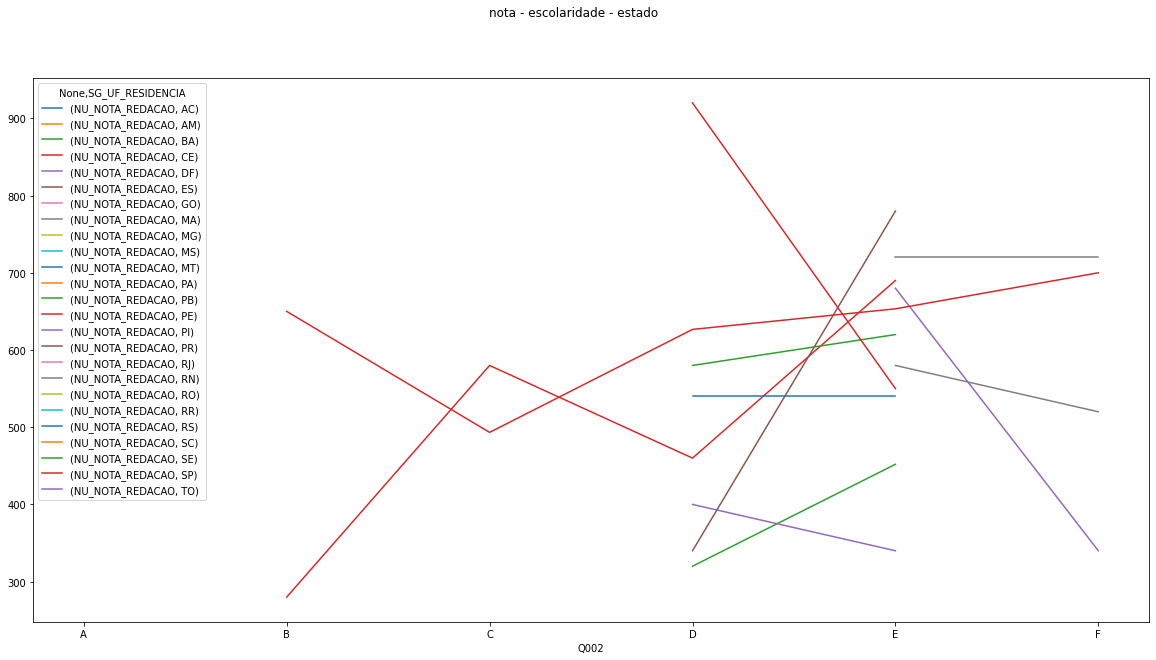

In [61]:
import matplotlib.pyplot as plt
fg,ax = plt.subplots(figsize=(20,10))
plt.suptitle('nota - escolaridade - estado')
socioEco.filter(items = ['SG_UF_RESIDENCIA','Q002','NU_NOTA_REDACAO']).where(socioEco.Q002 != 'H').groupby(['Q002','SG_UF_RESIDENCIA']).mean().sort_values(by='NU_NOTA_REDACAO',ascending=False).unstack().plot(ax=ax,) #vendo o comportamento das notas da redacao, separado por estado, conforme a escolaridade do pai, excluindo pai sem escolaridade
#unstack() separa por grupo as informacoes